# <font color='e6005c'>SIMPLE LINEAR REGRESSION:SALARY HIKE DATA   

## <font color='e6005c'> problem Statement

## <font color='1a1aff'> Salary_hike -> Build a prediction model for Salary_hike

In [1]:
#import required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as smf
import statsmodels.formula.api as sm

import scipy.stats as stats
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
salary_data=pd.read_csv('salary_data.csv')
salary_data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Checking for null values 
#Checking for data types
#Checking for shape of Delivery time dataset
#Checking for column names
#all in one function (info())
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#checking for the null values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
#checkinig the duplicate values 
salary_data[salary_data.duplicated()].shape

(0, 2)

In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data[salary_data.duplicated(keep=False)]

,YearsExperience,Salary


In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
#Checking for outliers in the data with the help of visualization_boxplot

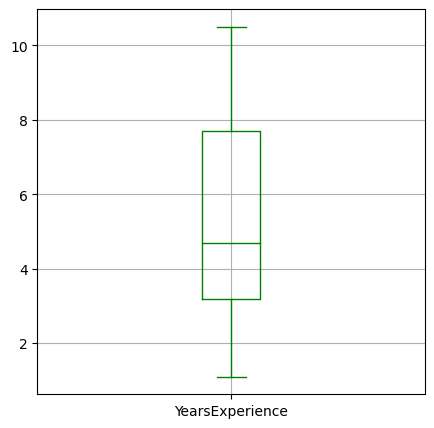

In [10]:
plt.figure(figsize = (5,5))
salary_data.boxplot(column=['YearsExperience'],color='g')
plt.show()

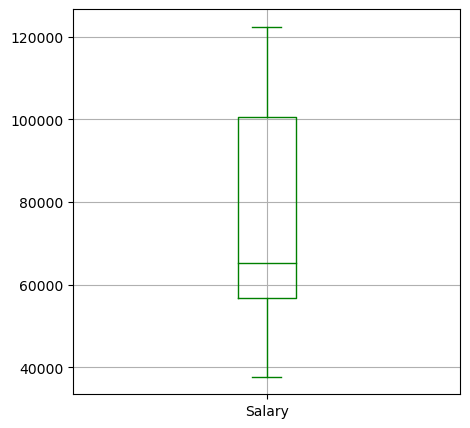

In [11]:
plt.figure(figsize = (5,5))
salary_data.boxplot(column=['Salary'],color='g')
plt.show()

## there is no outliers

In [12]:
#checking the Correlation 
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


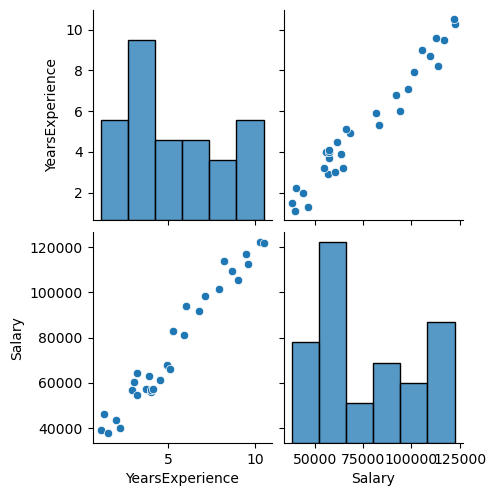

In [13]:
sns.pairplot(salary_data)
plt.show()

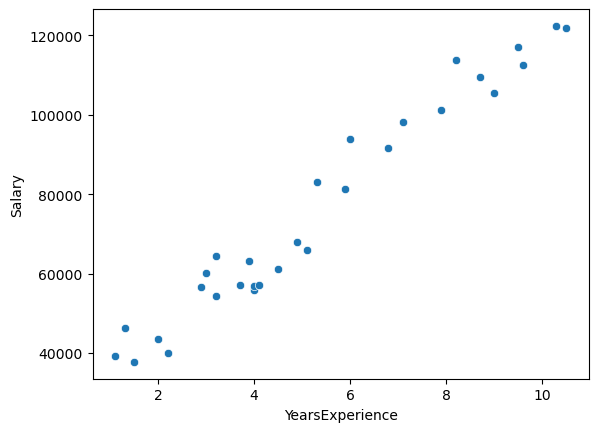

In [14]:
sns.scatterplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])
plt.show()

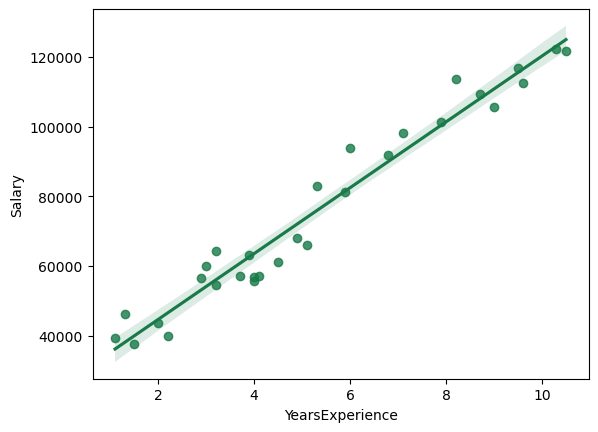

In [15]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'],color='#187a48')
plt.show()

## <font color='e6005c'>As you can see above 
+ There is good correlation between the two variable.
+ The score is more than 0.9 which is a good sign

<Axes: >

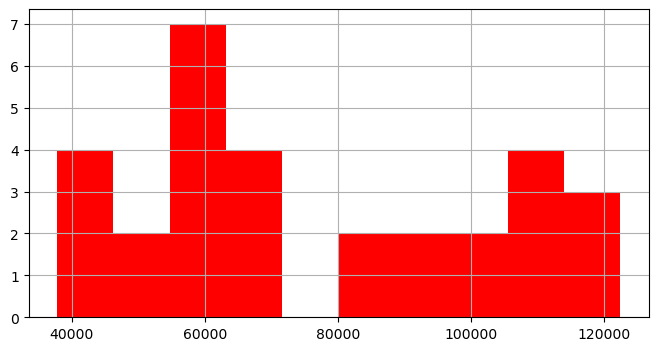

In [16]:
plt.figure(figsize=(8,4))
salary_data['Salary'].hist(color='r')

In [17]:
# Cheking if the data is normally ditributed, using distplot

<Axes: xlabel='YearsExperience', ylabel='Density'>

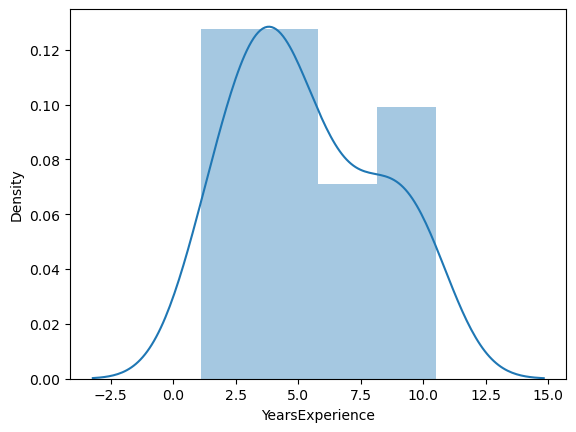

In [18]:
sns.distplot(salary_data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

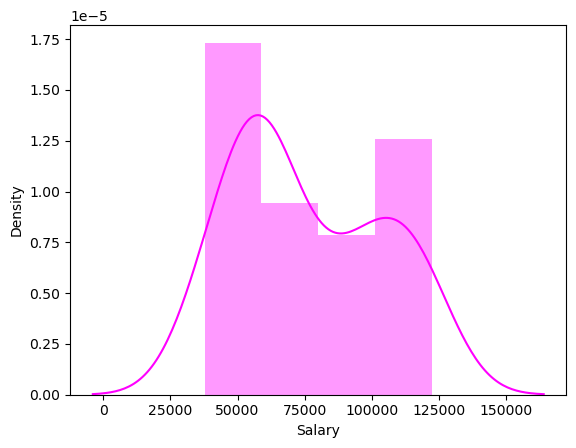

In [19]:
sns.distplot(salary_data['Salary'],color='magenta')

## Model1 -Creating a model, without applying Transformations

In [20]:
model1 = sm.ols('Salary~YearsExperience', data = salary_data).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        16:03:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# coefficients
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [24]:
#R-squared and Adj R-squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [25]:
actual = salary_data.Salary

In [26]:
# Checking the RMSE value
pred1 = model1.predict(salary_data.YearsExperience)

In [27]:
actual = salary_data.Salary

In [28]:
rmse1 = np.sqrt(mean_squared_error(actual, pred1))
print(rmse1)

5592.043608760662


## Model2- Creating a new model, by applying Logarithmic Transformation

In [29]:
model2 = sm.ols("Salary~np.log(YearsExperience)",data = salary_data).fit()

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        16:03:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [32]:
print(model2.tvalues,'\n',model2.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [33]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [34]:
# Checking the RMSE value
pred2 = model2.predict(salary_data.YearsExperience)

In [35]:
rmse2 = np.sqrt(mean_squared_error(actual, pred2))
print(rmse2)

10302.893706228308


## Model3- Construct a new model, by applying a Squareroot transformation

In [36]:
model3 = sm.ols('Salary~np.sqrt(YearsExperience)', data = salary_data).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           8.57e-18
Time:                        16:03:10   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [39]:
print(model3.tvalues,'\n',model3.pvalues)

Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 
 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [40]:
(model3.rsquared,model3.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [41]:
pred3=(model3.predict(salary_data.YearsExperience))

In [42]:
rmse3=np.sqrt(mean_squared_error(actual,pred3))
rmse3

7080.09573498304

## Model4-Creating an new model, by taking exponential transformation

In [43]:
model4 = sm.ols("np.log(Salary)~(YearsExperience)",data = salary_data).fit()

In [44]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           7.03e-18
Time:                        16:03:11   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model4.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [46]:
print(model4.tvalues,'\n', model4.pvalues)

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [47]:
pred4=np.exp(model4.predict(salary_data.YearsExperience))

In [48]:
rmse4=np.sqrt(mean_squared_error(actual,pred4))
rmse4

7213.235076620129

## Model5-creating a new model, by making a quadratic equation

In [49]:
salary_data1=salary_data.copy()
salary_data1["YrExpsqr"]=salary_data["YearsExperience"]*salary_data["YearsExperience"]
salary_data1.tail(10)

,YearsExperience,Salary,YrExpsqr
20,6.8,91738.0,46.24
21,7.1,98273.0,50.41
22,7.9,101302.0,62.41
23,8.2,113812.0,67.24
24,8.7,109431.0,75.69
25,9.0,105582.0,81.00
26,9.5,116969.0,90.25
27,9.6,112635.0,92.16
28,10.3,122391.0,106.09
29,10.5,121872.0,110.25


In [50]:
model5 = sm.ols("np.log(Salary)~(YearsExperience)+(YrExpsqr)",data = salary_data1).fit()

In [51]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.95e-18
Time:                        16:03:11   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
YrExpsqr           -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model5.params

Intercept          10.336852
YearsExperience     0.202382
YrExpsqr           -0.006614
dtype: float64

In [53]:
print(model5.tvalues,'\n',model5.pvalues)

Intercept          154.368412
YearsExperience      7.601136
YrExpsqr            -2.957139
dtype: float64 
 Intercept          2.559532e-41
YearsExperience    3.551262e-08
YrExpsqr           6.380581e-03
dtype: float64


In [54]:
(model5.rsquared,model5.rsquared_adj)

(0.948610863848735, 0.9448042611708636)

In [56]:
pred5=np.exp(model5.predict(salary_data1))

In [57]:
rmse5=np.sqrt(mean_squared_error(actual,pred5))
rmse5

5391.081582693624

In [58]:
table={'Models':(['model 1','model 2','model 3','model 4','model 5']),
      'R_squared':(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared),
      'R_squd_adj':(model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj),
      'RMSE':(rmse1,rmse2,rmse3,rmse4,rmse5)
      }
table=pd.DataFrame(table)
table

,Models,R_squared,R_squd_adj,RMSE
0,model 1,0.956957,0.955419,5592.043609
1,model 2,0.853889,0.848671,10302.893706
2,model 3,0.931001,0.928537,7080.095735
3,model 4,0.931967,0.929537,7213.235077
4,model 5,0.948611,0.944804,5391.081583


# Conclusion

##  we know higher R-squared value and a low RMSE value is better model so to predict the Salary hike on YearsExperince the model1 is better option. 

In [59]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = salary_data.YearsExperience
predicted['Salary'] = salary_data.Salary
predicted['Pred_salary_model1'] = pd.DataFrame(pred1)

predicted['Pred_salary_model2'] = pd.DataFrame(pred2)

predicted['Pred_salary_model3'] = pd.DataFrame(pred3)

predicted['Pred_salary_model4'] = pd.DataFrame(pred4)

predicted['Pred_salary_model5'] = pd.DataFrame(pred5)

predicted

,YearsExperience,Salary,Pred_salary_model1,Pred_salary_model2,Pred_salary_model3,Pred_salary_model4,Pred_salary_model5
0,1.1,39343.0,36187.158752,18795.848339,27470.511884,41998.957468,38233.559684
1,1.3,46205.0,38077.151217,25575.235192,31262.287009,43066.066794,39686.674746
2,1.5,37731.0,39967.143681,31382.551905,34771.976586,44160.289228,41173.227466
3,2.0,43525.0,44692.124842,43057.262306,42635.056211,47019.029189,45033.440973
4,2.2,39891.0,46582.117306,46925.138875,45499.687794,48213.688474,46633.832589
5,2.9,56642.0,53197.090931,58136.050079,54617.343293,52639.142472,52477.426306
6,3.0,60150.0,54142.087163,59511.842441,55825.518202,53303.675386,53341.747319
7,3.2,54445.0,56032.079627,62130.943929,58182.905200,54658.014935,55091.465477
8,3.2,64445.0,56032.079627,62130.943929,58182.905200,54658.014935,55091.465477
9,3.7,57189.0,60757.060788,68022.718504,63772.383867,58196.330788,59582.917523


## Predict for new data point

## model1 is good for prediction for Salary Hike

In [61]:
#for new data

newdata=pd.Series([5,11])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,11


In [62]:
model1.predict(data_pred)

0     73042.011806
1    129741.785735
dtype: float64